In [1]:
from tensorflow.keras.datasets import boston_housing
import pandas as pd

bh = boston_housing.load_data()
bh

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# data = pd.DataFrame(data=train_data)
# data

# print(len(train_data), len(train_targets))
# print(len(test_data), len(test_targets))

# print(train_data[0])
# print(test_data[0])

# print(train_data.shape, test_data.shape)

In [3]:
# #정규화
# x_mean = train_data.mean(axis = 0)
# x_std = train_data.std(axis = 0)
# # print(x_mean)
# # print(x_std)

# train_data -= x_mean
# train_data /= x_std
# # print(train_data)

# y_mean = test_data.mean(axis = 0)
# y_std = test_data.std(axis = 0 )
# # print(y_mean)
# # print(y_std)

# test_data -= y_mean
# test_data /= y_std

# print(train_data[0])
# print(test_data[0])

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [5]:
#정규화
x_mean = X_train.mean(axis = 0) #axis = 0 열의 평균
x_std = X_train.std(axis=0)

#입력데이터
X_train = (X_train-x_mean)/x_std
X_test = (X_test-x_mean)/x_std

y_mean = y_train.mean(axis = 0)
y_std = y_train.std(axis = 0)

#출력데이터
y_train = (y_train-y_mean)/y_std
y_test = (y_test - y_mean) / y_std

print(X_train[0])
print(y_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation = "relu", input_shape = (13, )),
    tf.keras.layers.Dense(units = 39, activation = "relu"),
    tf.keras.layers.Dense(units = 25, activation = "relu"),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = "mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 25)                1000      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 3821 (14.93 KB)
Trainable params: 3821 (14.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split=0.25)
#학습에 사용할 입력데이터 X_train, 목표값 y_train
#전체 데이터셋을 몇번 반복해서 학습할 지 : 25
#한번에(에포크) 32개의 샘플을 이용해서 학습, 미니배치 학습
#학습 데이터 중 일부를 검증 데이터 사용, 0.25 => 25% 검증데이터로 사용

Epoch 1/25



10/10 [==============================] - 3s 68ms/step - loss: 0.8124 - val_loss: 1.1655
Epoch 2/25
10/10 [==============================] - 0s 16ms/step - loss: 0.5934 - val_loss: 0.9663
Epoch 3/25
10/10 [==============================] - 0s 17ms/step - loss: 0.4770 - val_loss: 0.7940
Epoch 4/25
10/10 [==============================] - 0s 13ms/step - loss: 0.3820 - val_loss: 0.6533
Epoch 5/25
10/10 [==============================] - 0s 12ms/step - loss: 0.3001 - val_loss: 0.5563
Epoch 6/25
10/10 [==============================] - 0s 13ms/step - loss: 0.2474 - val_loss: 0.4583
Epoch 7/25
10/10 [==============================] - 0s 10ms/step - loss: 0.2044 - val_loss: 0.3813
Epoch 8/25
10/10 [==============================] - 0s 10ms/step - loss: 0.1730 - val_loss: 0.3226
Epoch 9/25
10/10 [==============================] - 0s 11ms/step - loss: 0.1557 - val_loss: 0.2870
Epoch 10/25
10/10 [==============================] - 0s 14ms/step - loss: 0.1444 - val_loss: 0.2575
Epoch 11/25
10/10 [=

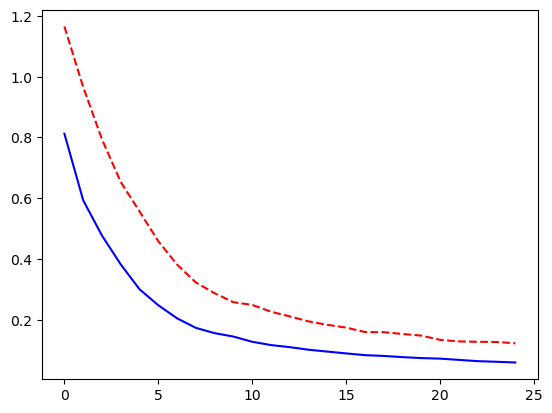

In [8]:
#손실그래프 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.show()